# Image Processing with Keras 

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
data = os.path.join("/gdrive/My Drive/flowers")
print(os.listdir(data))
small_data = '/gdrive/My Drive/flowers/flowers_small/train/train_tulip'
print(len(small_data))

['tulip', 'rose', 'flowers_small', 'sunflower', 'dandelion', 'daisy']
56


['tulip', 'rose', 'flowers_small', 'sunflower', 'dandelion', 'daisy']
------------------SIZE OF DATA SETS--------------------------
total daisy images: 769
total sunflower images: 734
total tulip images: 984
total rose images: 784
total dandelion images: 1053

------------------SIZE OF TRAINING SETS----------------------
total training daisy images: 582
total training sunflower images: 566
total training tulip images: 732
total training rose images: 591
total training dandelion images: 746

------------------SIZE OF TESTING SETS-----------------------
total testing daisy images: 193
total testing sunflower images: 162
total testing tulip images: 246
total testing rose images: 197
total testing dandelion images: 300 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooli

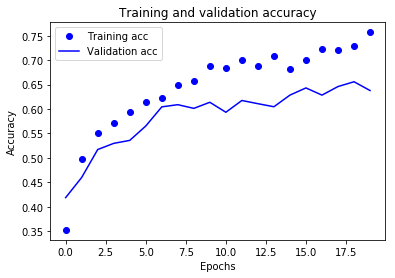

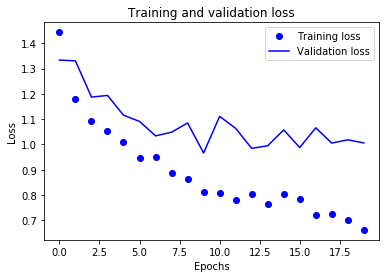

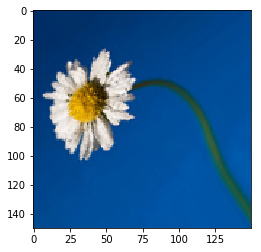

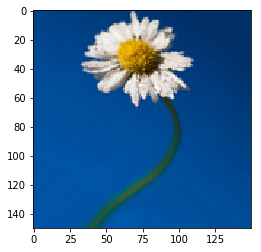

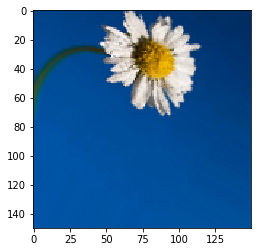

In [17]:
# import Keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras.optimizers import Adam

# This is module with image preprocessing utilities
from keras.preprocessing import image

# to display images and charts
import matplotlib.pyplot as plt
#import PyQt5

# specifically for cnn
from keras.layers import Dropout
import os


# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# import the dataset
original_dataset_dir = '/gdrive/My Drive/flowers'
# list the contents of the dataset
print(os.listdir(original_dataset_dir))

# import all the individual folders of flowers
flower_daisy_dir = '/gdrive/My Drive/flowers/daisy'
flower_sunflower_dir = '/gdrive/My Drive/flowers/sunflower'
flower_tulip_dir = '/gdrive/My Drive/flowers/tulip'
flower_rose_dir = '/gdrive/My Drive/flowers/rose'
flower_dandelion_dir = '/gdrive/My Drive/flowers/dandelion'


# print the sizes of the individual flower directories
print("------------------SIZE OF DATA SETS--------------------------")
print('total daisy images:', len(os.listdir(flower_daisy_dir)))
print('total sunflower images:', len(os.listdir(flower_sunflower_dir)))
print('total tulip images:', len(os.listdir(flower_tulip_dir)))
print('total rose images:', len(os.listdir(flower_rose_dir)))
print('total dandelion images:', len(os.listdir(flower_dandelion_dir)))

# I split the main directory into training and testing sets (75% and 25% respectively)
train_flower_daisy_dir = '/gdrive/My Drive/flowers/flowers_small/train/train_daisy'
train_flower_sunflower_dir = '/gdrive/My Drive/flowers/flowers_small/train/train_sunflower'
train_flower_tulip_dir = '/gdrive/My Drive/flowers/flowers_small/train/train_tulip'
train_flower_rose_dir = '/gdrive/My Drive/flowers/flowers_small/train/train_rose'
train_flower_dandelion_dir = '/gdrive/My Drive/flowers/flowers_small/train/train_dandelion'

test_flower_daisy_dir = '/gdrive/My Drive/flowers/flowers_small/test/test_daisy'
test_flower_sunflower_dir = '/gdrive/My Drive/flowers/flowers_small/test/test_sunflower'
test_flower_tulip_dir = '/gdrive/My Drive/flowers/flowers_small/test/test_tulip'
test_flower_rose_dir = '/gdrive/My Drive/flowers/flowers_small/test/test_rose'
test_flower_dandelion_dir = '/gdrive/My Drive/flowers/flowers_small/test/test_dandelion'

# print the sizes of the training sets
print("\n------------------SIZE OF TRAINING SETS----------------------")
print('total training daisy images:', len(os.listdir(train_flower_daisy_dir)))
print('total training sunflower images:', len(os.listdir(train_flower_sunflower_dir)))
print('total training tulip images:', len(os.listdir(train_flower_tulip_dir)))
print('total training rose images:', len(os.listdir(train_flower_rose_dir)))
print('total training dandelion images:', len(os.listdir(train_flower_dandelion_dir)))

# print the sizes of the testing sets
print("\n------------------SIZE OF TESTING SETS-----------------------")
print('total testing daisy images:', len(os.listdir(test_flower_daisy_dir)))
print('total testing sunflower images:', len(os.listdir(test_flower_sunflower_dir)))
print('total testing tulip images:', len(os.listdir(test_flower_tulip_dir)))
print('total testing rose images:', len(os.listdir(test_flower_rose_dir)))
print('total testing dandelion images:', len(os.listdir(test_flower_dandelion_dir)), '\n')

# Now that we have our training and testing sets we can build our CNN

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='Same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# padding same would produce output of the same size as the input
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='Same'))
# the filter convolves around the input volume by shifting two units at a time
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='Same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='Same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
# adding a drop out layer to the model to prevent over fitting
model.add(Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])


# I will also augment the training set here
# This hugely prevents over fitting because our model will never see the same image twice
train_datagen = ImageDataGenerator(
    # All images will be rescaled by 1./255
    rescale=1./255,
    # a value in degrees (0-180), a range with which to randomly rotate pictures
    rotation_range=45,
    # fraction of total width to randomly translate image horizontally
    width_shift_range=0.2,
    # fraction of total height to randomly translate image vertically
    height_shift_range=0.2,
    # randomly applying shearing transformations (displaces each point in fixed direction)
    shear_range=0.2,
    # randomly zooming inside pictures
    zoom_range=0.1,
    # divide inputs by std of the dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # randomly flipping half of the images horizontally
    horizontal_flip=True,
    # filling in newly created pixels, which can appear after a rotation or a width/height shift
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/gdrive/My Drive/flowers/flowers_small/train'

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        # number of samples sizes in each batch
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_dir = '/gdrive/My Drive/flowers/flowers_small/test'
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('\ndata batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

f_names = [os.path.join(train_flower_daisy_dir, f_name) for f_name in os.listdir(train_flower_daisy_dir)]

# pick one random image to augment just so we know what it looks like
img_path = f_names[5]
# read in the image and resize to our original 150 x 150 size
img = image.load_img(img_path, target_size=(150, 150))
# convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# flatten it
x = x.reshape((1,) + x.shape)

# here I will just show the same image randomly augmented 3 times
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    img_plot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

